In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read data
loc = r'C:\Program Files\Python36\Scripts\Coursera_ML\ex2\ex2data1.txt'
data = pd.read_csv(loc, sep = ',', header = None)
data.shape

(100, 3)

In [4]:
data.columns = ['exam1', 'exam2', 'admission']
data.head()

,exam1,exam2,admission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


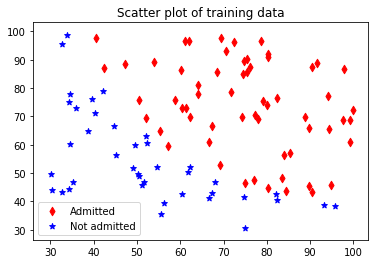

In [23]:
# plot
# with matplotlib
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
title = ax.set_title('Scatter plot of training data')
plot1 = ax.scatter(data[data.admission == 1].exam1, data[data.admission == 1].exam2, marker = 'd', c = 'red',
                  label = 'Admitted')
plot2 = ax.scatter(data[data.admission == 0].exam1, data[data.admission == 0].exam2, marker = '*', c = 'blue',
                  label = 'Not admitted')
ax.legend()

In [25]:
# warmup: sigmoid function
# for one element
def sigmoid(x):
    sig = 1 / (1 + np.exp(-x))
    return sig

In [33]:
# sigmoid for vector/matrix/df


TypeError: bad operand type for unary -: 'list'